In [55]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [56]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [57]:
# DJE = pd.read_csv('./magazine/final/DJE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [58]:
# DJE['ADFN_2'] = DJE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [59]:
# DJE['ADFN_2']

### 5

In [60]:
# D5JE = pd.read_csv('./magazine/final/D5JE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [61]:
# D5JE['ADFN_2'] = D5JE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [62]:
# D5JE['ADFN_2']

In [63]:
D9JI = pd.read_csv('./magazine/final/D9JI_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [64]:
D9JI['ADFN_2'] = D9JI['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [65]:
D9JI['ADFN_2']

0      [빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새롭, 사랑,...
1      [긍정, 기운, 뷰티, 라이프, 철학, 가지, 배우, 하늬, DIOR, 뷰티, 글로...
2      [화려, 패턴, SIGNATURE, 리처드, 퀸, 다크, 티, 즘, 힘, 보태, 데...
3      [물, 방울, 무늬, 수영복, 이즈, 데, 이즈, DAZE, DAYZ, 심플, 메탈...
4      [반면, HEDI, SLIMANE, CELINE, 피비, 파일, 녕, CELINE,...
                             ...                        
349    [지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마...
350    [지수, 웃긴, 캐릭터, 이상한, 캐릭터, 라서, 웃김, BLACKPINK, 하든,...
351    [지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ...
352    [저녁, 도레미, 마켓, 지수, BLACKPINK, 예전, 소통, 하려구, v, 앱...
353    [감도, 쩌, BLACKPINK, 참도, 글코, 드라마, 주인공, 지수, 패널, 지...
Name: ADFN_2, Length: 354, dtype: object

### top50 리스트 생성

In [66]:
top500 = pd.read_csv('./D9JI_top500.csv', sep='|', encoding = 'utf-8')

In [67]:
top500

,word,count
0,지수,4231
1,예쁘다,1889
2,DIOR,776
3,귀엽다,740
4,얼굴,524
...,...,...
495,화,20
496,상상,20
497,장미,20
498,작은,20


In [68]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['지수', '예쁘다', 'DIOR', '귀엽다', '얼굴', '사랑', '노래', '매력', '음악', '패션', '목소리', '스타일', '춤', '배우', '아이돌', '실력', '컬렉션', '드레스', '라이브', '성격', '쇼', '브랜드', '음색', '최고', '여성', '누나', '영화', '여자', '연기', '블랙']


In [69]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['지수', '예쁘다', 'DIOR', '귀엽다', '얼굴', '사랑', '노래', '매력', '음악', '패션', '목소리', '스타일', '춤', '배우', '아이돌', '실력', '컬렉션', '드레스', '라이브', '성격', '쇼', '브랜드', '음색', '최고', '여성', '누나', '영화', '여자', '연기', '블랙', '모델', '메이크업', '여신', '외모', '세계', '무대', '비주얼', '하우스', '재킷', '팬츠', '백', '패턴', '디자이너', '분위기', '라인', '완성', '장식', '봄', '웃음', '아름다운']


### top100

In [70]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['지수', '예쁘다', 'DIOR', '귀엽다', '얼굴', '사랑', '노래', '매력', '음악', '패션', '목소리', '스타일', '춤', '배우', '아이돌', '실력', '컬렉션', '드레스', '라이브', '성격', '쇼', '브랜드', '음색', '최고', '여성', '누나', '영화', '여자', '연기', '블랙', '모델', '메이크업', '여신', '외모', '세계', '무대', '비주얼', '하우스', '재킷', '팬츠', '백', '패턴', '디자이너', '분위기', '라인', '완성', '장식', '봄', '웃음', '아름다운', '작품', '핑크', '드라마', '마음', '룩', '티', '노력', '느낌', nan, '자연', '솔로', '컬러', '이미지', '셔츠', '레전드', '팬', '걸그룹', '눈', 'MARIA', '화이트', '친구', '사랑스럽다', '가족', '시작', '매치', '시즌', '레드', '스타', '데님', '영감', '인기', 'DESIGN', '가수', '입덕', '뷰티', '존재', '톱', '아티스트', '디자인', '좋', '티셔츠', '카디건', '보컬', '이야기', '스커트', '촬영', '아이템', '천재', '반전', '옷']


In [71]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['지수', '예쁘다', 'DIOR', '귀엽다', '얼굴', '사랑', '노래', '매력', '음악', '패션', '목소리', '스타일', '춤', '배우', '아이돌', '실력', '컬렉션', '드레스', '라이브', '성격', '쇼', '브랜드', '음색', '최고', '여성', '누나', '영화', '여자', '연기', '블랙', '모델', '메이크업', '여신', '외모', '세계', '무대', '비주얼', '하우스', '재킷', '팬츠', '백', '패턴', '디자이너', '분위기', '라인', '완성', '장식', '봄', '웃음', '아름다운', '작품', '핑크', '드라마', '마음', '룩', '티', '노력', '느낌', nan, '자연', '솔로', '컬러', '이미지', '셔츠', '레전드', '팬', '걸그룹', '눈', 'MARIA', '화이트', '친구', '사랑스럽다', '가족', '시작', '매치', '시즌', '레드', '스타', '데님', '영감', '인기', 'DESIGN', '가수', '입덕', '뷰티', '존재', '톱', '아티스트', '디자인', '좋', '티셔츠', '카디건', '보컬', '이야기', '스커트', '촬영', '아이템', '천재', '반전', '옷', '여름', '한국', '연예인', 'BLINK', '감독', '클래식', '달곰', '힘들', '코트', '소녀', '빛', '인형', '찰떡', '도전', '립', '작업', '힘', '디렉터', '천사', '입술', 'LAURENT', '벨트', '부츠', '파리', '앨범', '화보', '꽃', '취향', '새로운', '시크', '멋있다', '식', '소재', '대표', '새', '점', '체크', '사이즈', '트', '장면', '해외', '의상', '미소', '코디', 'COUTURE', '역할', '사이', '세', '평소', '니트', '말투', '관심', '출연', '실루엣', '커', 'CHRISTIAN', '실물', '만큼',

In [72]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['지수', '예쁘다', 'DIOR', '귀엽다', '얼굴', '사랑', '노래', '매력', '음악', '패션', '목소리', '스타일', '춤', '배우', '아이돌', '실력', '컬렉션', '드레스', '라이브', '성격', '쇼', '브랜드', '음색', '최고', '여성', '누나', '영화', '여자', '연기', '블랙', '모델', '메이크업', '여신', '외모', '세계', '무대', '비주얼', '하우스', '재킷', '팬츠', '백', '패턴', '디자이너', '분위기', '라인', '완성', '장식', '봄', '웃음', '아름다운', '작품', '핑크', '드라마', '마음', '룩', '티', '노력', '느낌', nan, '자연', '솔로', '컬러', '이미지', '셔츠', '레전드', '팬', '걸그룹', '눈', 'MARIA', '화이트', '친구', '사랑스럽다', '가족', '시작', '매치', '시즌', '레드', '스타', '데님', '영감', '인기', 'DESIGN', '가수', '입덕', '뷰티', '존재', '톱', '아티스트', '디자인', '좋', '티셔츠', '카디건', '보컬', '이야기', '스커트', '촬영', '아이템', '천재', '반전', '옷', '여름', '한국', '연예인', 'BLINK', '감독', '클래식', '달곰', '힘들', '코트', '소녀', '빛', '인형', '찰떡', '도전', '립', '작업', '힘', '디렉터', '천사', '입술', 'LAURENT', '벨트', '부츠', '파리', '앨범', '화보', '꽃', '취향', '새로운', '시크', '멋있다', '식', '소재', '대표', '새', '점', '체크', '사이즈', '트', '장면', '해외', '의상', '미소', '코디', 'COUTURE', '역할', '사이', '세', '평소', '니트', '말투', '관심', '출연', '실루엣', '커', 'CHRISTIAN', '실물', '만큼',

In [73]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['지수', '예쁘다', 'DIOR', '귀엽다', '얼굴', '사랑', '노래', '매력', '음악', '패션', '목소리', '스타일', '춤', '배우', '아이돌', '실력', '컬렉션', '드레스', '라이브', '성격', '쇼', '브랜드', '음색', '최고', '여성', '누나', '영화', '여자', '연기', '블랙', '모델', '메이크업', '여신', '외모', '세계', '무대', '비주얼', '하우스', '재킷', '팬츠', '백', '패턴', '디자이너', '분위기', '라인', '완성', '장식', '봄', '웃음', '아름다운', '작품', '핑크', '드라마', '마음', '룩', '티', '노력', '느낌', nan, '자연', '솔로', '컬러', '이미지', '셔츠', '레전드', '팬', '걸그룹', '눈', 'MARIA', '화이트', '친구', '사랑스럽다', '가족', '시작', '매치', '시즌', '레드', '스타', '데님', '영감', '인기', 'DESIGN', '가수', '입덕', '뷰티', '존재', '톱', '아티스트', '디자인', '좋', '티셔츠']


### top50만 남기기

In [74]:
len(D9JI)

354

In [75]:
top30_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [76]:
top50_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [77]:
top100_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [78]:
top200_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [79]:
top300_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [80]:
top500_word = []
for i in range(len(D9JI)):
    w=[]
    for word in D9JI.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [81]:
D9JI

,magazine,brand,title,word,ADFN,ADFN_2
0,A,D,빈티지 쇼핑의 시대,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',...","[빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새롭, 사랑,..."
1,A,D,디올 뷰티 코리아의 앰배서더 이하늬를 만나다,"[""['긍정의 기운, 그리고 자신만의 뷰티와 라이프 철학을 가지고 있는 배우 이하늬...","['긍정', '기운', '뷰티', '라이프', '철학', '가지', '배우', '하...","[긍정, 기운, 뷰티, 라이프, 철학, 가지, 배우, 하늬, DIOR, 뷰티, 글로..."
2,A,D,다크 로맨티시즘,['화려한 패턴이 시그니처인 리처드 퀸 역시 다크 로맨티시즘에 힘을 보탰다. 데뷔하...,"['화려', '패턴', 'SIGNATURE', '리처드', '퀸', '다크', '티...","[화려, 패턴, SIGNATURE, 리처드, 퀸, 다크, 티, 즘, 힘, 보태, 데..."
3,A,D,LOOK AT THESE!,"['물방울 무늬 수영복은 13만9천원, 데이즈데이즈(Daze Dayz). 심플한 메...","['물', '방울', '무늬', '수영복', '이즈', '데', '이즈', 'DAZ...","[물, 방울, 무늬, 수영복, 이즈, 데, 이즈, DAZE, DAYZ, 심플, 메탈..."
4,A,D,패션 컬트의 시대,['반면 에디 슬리먼의 셀린느는 어땠나? 그는 피비 파일로는커녕 셀린느라는 브랜드의...,"['반면', 'HEDI', 'SLIMANE', 'CELINE', '피비', '파일'...","[반면, HEDI, SLIMANE, CELINE, 피비, 파일, 녕, CELINE,..."
...,...,...,...,...,...,...
349,YOUTUBE,Ji,블랙핑크 지수 실력없다고 왜이래~ 나 블랙핑크야~ 제대로 보여줄게! [All Abo...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많이...,"['지수', '진짜', '보면', '볼수록', '더', '좋아짐', '성격', '도...","[지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마..."
350,YOUTUBE,Ji,사랑스러움지수 한도초과! 🧡지수🖤 모음 3탄! [예능맛ZIP 맛남의 광장_Delic...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,"['지수', '엄청', '웃긴', '캐릭터', '라기', '보다', '이상한', '...","[지수, 웃긴, 캐릭터, 이상한, 캐릭터, 라서, 웃김, BLACKPINK, 하든,..."
351,YOUTUBE,Ji,지수 MBTI는 'CUTE'가 분명해 🧡지수🖤 모음 5탄! [예능맛ZIP 맛남의 광...,"['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ☆...","['지수', '는', '멘트', '하', '나', '하나', '가', '넘', '재...","[지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ..."
352,YOUTUBE,Ji,지수가 먹지 지수 먹방 영상😎 _ BLACKPINK JISOO_korean_comm...,['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 'BLACKPI...,"['오늘', '저녁', '7시', '40분', '도레미', '마켓', '에', '지...","[저녁, 도레미, 마켓, 지수, BLACKPINK, 예전, 소통, 하려구, v, 앱..."


### item 남기기

In [82]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [83]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [84]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [85]:
# len(top100_not_item_word)

In [86]:
# top100_not_item_word[1]

In [87]:
# top50_word

In [88]:
len(top50_word)

354

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [89]:
# 어프라이어리(Apriori)
from apyori import apriori

In [90]:
top30_word[0]

['패션', '사랑', '사랑', '사랑', '패션', '컬렉션', 'DIOR']

In [100]:
###### 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
173,"(패션, DIOR)",0.257062,"[((), (패션, DIOR), 0.2570621468926554, 1.0), ((...",2
279,"(사랑, 지수)",0.197740,"[((), (사랑, 지수), 0.1977401129943503, 1.0), ((사랑...",2
314,"(얼굴, 지수)",0.194915,"[((), (얼굴, 지수), 0.19491525423728814, 1.0), ((얼...",2
234,"(지수, 매력)",0.192090,"[((), (지수, 매력), 0.192090395480226, 1.0), ((매력)...",2
166,"(DIOR, 지수)",0.180791,"[((), (DIOR, 지수), 0.1807909604519774, 1.0), ((...",2
169,"(컬렉션, DIOR)",0.180791,"[((), (컬렉션, DIOR), 0.1807909604519774, 1.0), (...",2
150,"(DIOR, 스타일)",0.177966,"[((), (DIOR, 스타일), 0.17796610169491525, 1.0), ...",2
141,"(브랜드, DIOR)",0.166667,"[((), (브랜드, DIOR), 0.16666666666666666, 1.0), ...",2
194,"(지수, 귀엽다)",0.152542,"[((), (지수, 귀엽다), 0.15254237288135594, 1.0), ((...",2
129,"(드레스, DIOR)",0.152542,"[((), (드레스, DIOR), 0.15254237288135594, 1.0), ...",2


In [101]:
idx = []
for i in df.index:
    if '제니' in df.loc[i, 'items']:
        idx.append(i)

In [102]:
df.loc[idx]

,items,support,ordered_statistics,length


In [103]:
jenny_items = df.loc[idx, 'items']

In [104]:
for word in jenny_items:
    for item in word:
        print(item)

### networkx 그래프 정의

In [105]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [106]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [107]:
pos = nx.spring_layout(G)

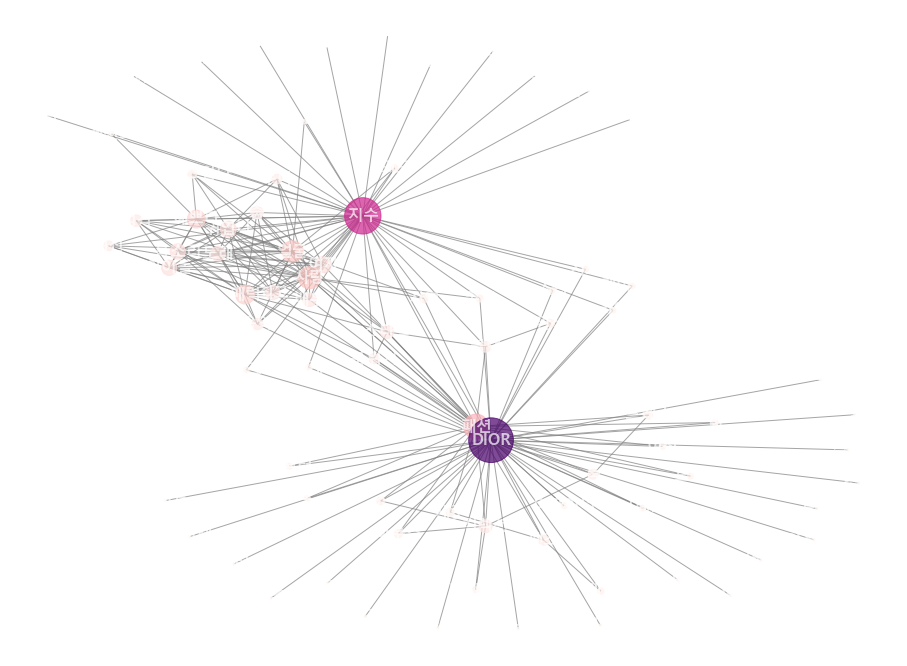

In [108]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_D9JI_top500_mins07-w.png', bbox_inches = 'tight', transparent = True)
plt.show()
